## Project Objectives

Create a machine learning model that predicts the relationship status based on different features.

The features implemented in the model are: body type, religion, sex, orientation, education 

### Import Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### Load Data

In [173]:
df = pd.read_csv('profiles.csv')
pd.set_option("display.max_columns", None)

### EDA

In [174]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [175]:
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

 creating new column for education : 0 if graduated, 1 if still working or dropeed out 

In [176]:
df['education'] = df['education'].astype(str)

In [177]:
df['graduated'] = df['education'].apply(lambda x:1 if 'graduated' in x else 0)

creating new columm for location: 0 for not popular location, 1 for a popular location. Popularity was analyzed on existing data below

In [178]:
loc = []
locations = df.location.str.split(', ')
for i in range(len(locations)):
    loc.append(locations[i][1])

In [179]:
loc = np.array(loc)

In [180]:
unique, counts = np.unique(loc, return_counts=True)
#print (np.asarray((unique, counts)).T)

In [181]:
loc = []
locations = df.location.str.split(', ')
for i in range(len(locations)):
    if locations[i][1] == 'california':
        loc.append(locations[i][0])

In [182]:
unique, counts = np.unique(loc, return_counts=True)

In [183]:
over200 = []
count = 0
for i in range(len(counts)):
    if counts[i] > 200:
        over200.append([unique[i], counts[i]])
    else:
        count += counts[i]

In [184]:
over200 = dict(over200)
over200['other'] = count

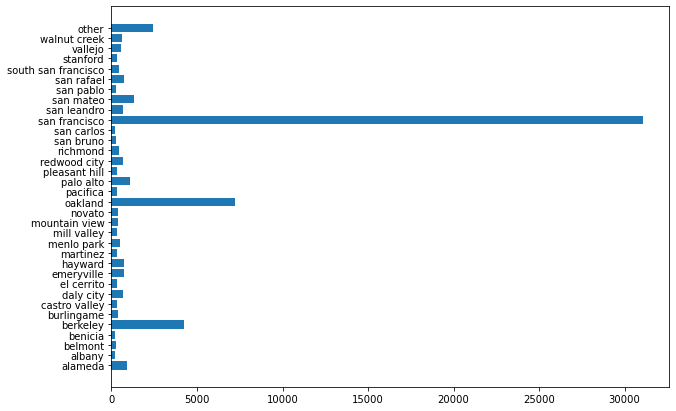

In [185]:
fig = plt.figure(figsize = (10,7))
plt.barh(range(len(over200)),list(over200.values()), align='center')
plt.yticks(range(len(over200)), list(over200.keys()) )
plt.show()

In [186]:
df['popular_loc'] = df['location'].apply(lambda x:1 if 'san francisco' in x or 'oakland' in x or 'berkeley' in x else 0)

In [187]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,graduated,popular_loc
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,0,1
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,0,1
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,1,1
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,0,1
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,1,1


In [188]:
df.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [189]:
df['diet'] = df['diet'].astype(str)
df['is_diet_strict'] = df['diet'].apply(lambda x:0 if 'anything' in x else 1)

In [190]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [191]:
df['body_type'] = df['body_type'].astype(str)
df['works_out'] = df.body_type.apply(lambda x:1 if 'fit' in x or 'athletic' in x or 'jacked' in x else 0)

In [192]:
df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [193]:
df['drinks'] = df.drinks.map({'not at all': 1, 'rarely':2, 'socially': 3, 'often':4, 'very often':5, 'desperately':6})

In [194]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [195]:
df['drugs'] = df.drugs.map({'never': 1, 'sometimes':2, 'often': 3})

In [196]:
df['ethnicity'] = df['ethnicity'].astype(str)
df['is_minority'] = df.ethnicity.apply(lambda x:0 if 'white' in x else 1)

In [197]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [198]:
df['income_range'] = df.income.apply(lambda x:'low' if x<40000 else ('medium' if x<100000 else 'high'))

In [199]:
df['income_range'] = df.income_range.map({'low':1,'medium':2,'high':3})

In [200]:
df['sex'] = df.sex.map({'m':0, 'f':1})

In [201]:
df = pd.get_dummies(df, columns = ['orientation'])

In [202]:
df['speaks'] = df['speaks'].astype(str)
df['only_one_lan'] = df.speaks.apply(lambda x:0 if ',' in x else 1)

In [203]:
df['smokes'] = df.smokes.map({'no':1, 'trying to quit':2, 'when drinking':3, 'sometimes':4, 'yes':5})

In [204]:
df['pets'] = df['pets'].astype(str)
df['has_pets'] = df.pets.apply(lambda x:1 if 'has' in x else 0)

In [205]:
df['religion'] = df['religion'].astype(str)
df['believes_in_god'] = df.religion.apply(lambda x:0 if 'atheism' in x else 1) 

In [243]:
df1 = df[['age','drinks', 'drugs', 'height','sex','smokes',
          'graduated', 'popular_loc','is_diet_strict','works_out','is_minority','income_range',
          'orientation_bisexual','orientation_gay','orientation_straight', 'only_one_lan','has_pets','believes_in_god','status']]

In [244]:
len(df1)

59946

In [245]:
df1.isna().sum()

age                         0
drinks                   2985
drugs                   14080
height                      3
sex                         0
smokes                   5512
graduated                   0
popular_loc                 0
is_diet_strict              0
works_out                   0
is_minority                 0
income_range                0
orientation_bisexual        0
orientation_gay             0
orientation_straight        0
only_one_lan                0
has_pets                    0
believes_in_god             0
status                      0
dtype: int64

In [246]:
#df1['drugs'] = df1.drugs.fillna(1)

In [247]:
df1 = df1.dropna()

In [248]:
len(df1)

42495

In [249]:
df1 = df1[df1.status != 'unknown']

In [250]:
df1.status.value_counts()

single            39477
seeing someone     1478
available          1289
married             245
Name: status, dtype: int64

In [251]:
df1['single'] = df.status.apply(lambda x:1 if 'single' in x else 0)

In [254]:
df1 = df1.drop('status', axis=1)

In [259]:
features = df1.iloc[:,:-1]
target = df1.iloc[:,-1]

In [264]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

### Data Preprocessing 

Scaling 

In [265]:
scaler = StandardScaler()

X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

1st model

In [267]:
log = LogisticRegression().fit(X_train_s,y_train)
y_pred = log.predict(X_test_s)
print('The accuracy is %.3f' %log.score(X_test_s,y_test))

The accuracy is 0.927


In [271]:
print(classification_report(y_test,y_pred, target_names = ['not single','single']))

              precision    recall  f1-score   support

  not single       0.34      0.02      0.03       613
      single       0.93      1.00      0.96      7885

    accuracy                           0.93      8498
   macro avg       0.64      0.51      0.50      8498
weighted avg       0.89      0.93      0.89      8498



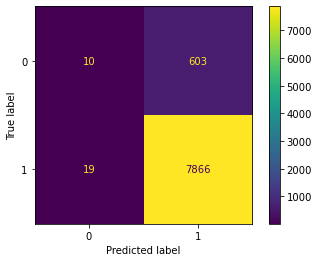

In [273]:
plot_confusion_matrix(log, X_test_s, y_test)

In [286]:
coef = log.coef_
labels = features.columns

In [287]:
range(len(labels))

range(0, 18)

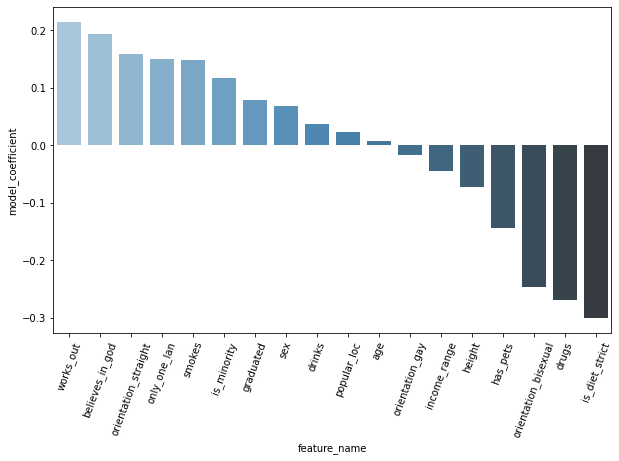

In [309]:
full_col_names = list(features.columns.values)
coef = pd.DataFrame({'feature_name': full_col_names, 'model_coefficient': log.coef_.transpose().flatten()})
coef = coef.sort_values('model_coefficient',ascending=False)
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x='feature_name', y='model_coefficient', data = coef, palette = 'Blues_d')
ax.set_xticklabels(rotation = 70, labels=coef.feature_name)
plt.show()